# Analysing Property Prices in Aberdeen Scotland.



## Introduction

House price prediction models are usually based on the size of the property in sqft or m^2 but rarely on the quality of the postal area in which the property is situated. The aim of this project is to predict how much a tennant is likely to pay or how much a landlord could charge to rent a property in a given postal area based on area class and number of bedrooms.

The data was scraped from https://www.rightmove.co.uk/property-to-rent/Aberdeen.html using the Beautifulsoup module, cleaned, analysed, saved in a csv file and used to predict rental price using a linear regression algorithm. 

## Methodology and Analysis

### Step 1: Scraping the Data.


In [234]:
from bs4 import BeautifulSoup
from urllib.request import urlopen as uReq
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

Each webpage was loaded into the notebook as html text as shown below.   

In [127]:
# Create variables to store data from each page of rightmove.co.uk API with Aberdeen properties to rent

my_url1 = 'https://www.rightmove.co.uk/property-to-rent/Aberdeen.html' 
my_url2 = 'https://www.rightmove.co.uk/property-to-rent/Aberdeen.html?locationIdentifier=REGION%5E4&index=24&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url3 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=48&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url4 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=72&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url5 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=96&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url6 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=120&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url7 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=144&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url8 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=168&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url9 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=192&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url10 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=216&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url11 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=240&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url12 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=264&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url13 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=288&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url14 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=312&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url15 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=336&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url16 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=360&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url17 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=384&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url18 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=408&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url19 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=432&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url20 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=456&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url21 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=480&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url22 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=504&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url23 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=528&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url24 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=552&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url25 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=576&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url26 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=600&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url27 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=624&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url28 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=648&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url29 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=672&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url30 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=696&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url31 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=720&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url32 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=744&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url33 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=768&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url34 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=792&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url35 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=816&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url36 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=840&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url37 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=864&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url38 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=888&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url39 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=912&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='
my_url40 = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=REGION%5E4&index=936&propertyTypes=&mustHave=&dontShow=&furnishTypes=&keywords='

# Opening up connection and grabbing the page

uClient1 = uReq(my_url1)
uClient2 = uReq(my_url2)
uClient3 = uReq(my_url3)
uClient4 = uReq(my_url4)
uClient5 = uReq(my_url5)
uClient6 = uReq(my_url6)
uClient7 = uReq(my_url7)
uClient8 = uReq(my_url8)
uClient9 = uReq(my_url9)
uClient10 = uReq(my_url10)
uClient11 = uReq(my_url11)
uClient12 = uReq(my_url12)
uClient13 = uReq(my_url13)
uClient14 = uReq(my_url14)
uClient15 = uReq(my_url15)
uClient16 = uReq(my_url16)
uClient17 = uReq(my_url17)
uClient18 = uReq(my_url18)
uClient19 = uReq(my_url19)
uClient20 = uReq(my_url20)
uClient21 = uReq(my_url21)
uClient22 = uReq(my_url22)
uClient23 = uReq(my_url23)
uClient24 = uReq(my_url24)
uClient25 = uReq(my_url25)
uClient26 = uReq(my_url26)
uClient27 = uReq(my_url27)
uClient28 = uReq(my_url28)
uClient29 = uReq(my_url29)
uClient30 = uReq(my_url30)
uClient31 = uReq(my_url31)
uClient32 = uReq(my_url32)
uClient33 = uReq(my_url33)
uClient34 = uReq(my_url34)
uClient35 = uReq(my_url35)
uClient36 = uReq(my_url36)
uClient37 = uReq(my_url37)
uClient38 = uReq(my_url38)
uClient39 = uReq(my_url39)
uClient40 = uReq(my_url40)

# Reading and storing data froom each page

page1_html = uClient1.read()
page2_html = uClient2.read()
page3_html = uClient3.read()
page4_html = uClient4.read()
page5_html = uClient5.read()
page6_html = uClient6.read()
page7_html = uClient7.read()
page8_html = uClient8.read()
page9_html = uClient9.read()
page10_html = uClient10.read()
page11_html = uClient11.read()
page12_html = uClient12.read()
page13_html = uClient13.read()
page14_html = uClient14.read()
page15_html = uClient15.read()
page16_html = uClient16.read()
page17_html = uClient17.read()
page18_html = uClient18.read()
page19_html = uClient19.read()
page20_html = uClient20.read()
page21_html = uClient21.read()
page22_html = uClient22.read()
page23_html = uClient23.read()
page24_html = uClient24.read()
page25_html = uClient25.read()
page26_html = uClient26.read()
page27_html = uClient27.read()
page28_html = uClient28.read()
page29_html = uClient29.read()
page30_html = uClient30.read()
page31_html = uClient31.read()
page32_html = uClient32.read()
page33_html = uClient33.read()
page34_html = uClient34.read()
page35_html = uClient35.read()
page36_html = uClient36.read()
page37_html = uClient37.read()
page38_html = uClient38.read()
page39_html = uClient39.read()
page40_html = uClient40.read()

# Closing webpage connections 

uClient1.close()
uClient2.close()
uClient3.close()
uClient4.close()
uClient5.close()
uClient6.close()
uClient7.close()
uClient8.close()
uClient9.close()
uClient10.close()
uClient11.close()
uClient12.close()
uClient13.close()
uClient14.close()
uClient15.close()
uClient16.close()
uClient17.close()
uClient18.close()
uClient19.close()
uClient20.close()
uClient21.close()
uClient22.close()
uClient23.close()
uClient24.close()
uClient25.close()
uClient26.close()
uClient27.close()
uClient28.close()
uClient29.close()
uClient30.close()
uClient31.close() 
uClient32.close() 
uClient33.close() 
uClient34.close() 
uClient35.close() 
uClient36.close() 
uClient37.close() 
uClient38.close() 
uClient39.close() 
uClient40.close() 
        
# Html parsing with Beutifulsoup 

page1_soup = BeautifulSoup(page1_html, "html.parser")
page2_soup = BeautifulSoup(page2_html, "html.parser")
page3_soup = BeautifulSoup(page3_html, "html.parser")
page4_soup = BeautifulSoup(page4_html, "html.parser")
page5_soup = BeautifulSoup(page5_html, "html.parser")
page6_soup = BeautifulSoup(page6_html, "html.parser")
page7_soup = BeautifulSoup(page7_html, "html.parser")
page8_soup = BeautifulSoup(page8_html, "html.parser")
page9_soup = BeautifulSoup(page9_html, "html.parser")
page10_soup = BeautifulSoup(page10_html, "html.parser")
page11_soup = BeautifulSoup(page11_html, "html.parser")
page12_soup = BeautifulSoup(page12_html, "html.parser")
page13_soup = BeautifulSoup(page13_html, "html.parser")
page14_soup = BeautifulSoup(page14_html, "html.parser")
page15_soup = BeautifulSoup(page15_html, "html.parser")
page16_soup = BeautifulSoup(page16_html, "html.parser")
page17_soup = BeautifulSoup(page17_html, "html.parser")
page18_soup = BeautifulSoup(page18_html, "html.parser")
page19_soup = BeautifulSoup(page19_html, "html.parser")
page20_soup = BeautifulSoup(page20_html, "html.parser")
page21_soup = BeautifulSoup(page21_html, "html.parser")
page22_soup = BeautifulSoup(page22_html, "html.parser")
page23_soup = BeautifulSoup(page23_html, "html.parser")
page24_soup = BeautifulSoup(page24_html, "html.parser")
page25_soup = BeautifulSoup(page25_html, "html.parser")
page26_soup = BeautifulSoup(page26_html, "html.parser")
page27_soup = BeautifulSoup(page27_html, "html.parser")
page28_soup = BeautifulSoup(page28_html, "html.parser")
page29_soup = BeautifulSoup(page29_html, "html.parser")
page30_soup = BeautifulSoup(page30_html, "html.parser")
page31_soup = BeautifulSoup(page31_html, "html.parser")
page32_soup = BeautifulSoup(page32_html, "html.parser")
page33_soup = BeautifulSoup(page33_html, "html.parser")
page34_soup = BeautifulSoup(page34_html, "html.parser")
page35_soup = BeautifulSoup(page35_html, "html.parser")
page36_soup = BeautifulSoup(page36_html, "html.parser")
page37_soup = BeautifulSoup(page37_html, "html.parser")
page38_soup = BeautifulSoup(page38_html, "html.parser")
page39_soup = BeautifulSoup(page39_html, "html.parser")
page40_soup = BeautifulSoup(page40_html, "html.parser")


### Step 2: Cleaning the Data.

On the rightmove website the number of bedrooms is always written with an h2 tag as shown below. All h2 values were found using Beutifulsoups' findAll function variable called bedrooms. An example for one page is shown below.


In [128]:
bedrooms = page1_soup.findAll("h2")
print(bedrooms)

[<h2 class="propertyCard-title" itemprop="name">
            2 bedroom apartment        </h2>, <h2 class="propertyCard-title" itemprop="name">
            1 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            2 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            2 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            2 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            3 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            1 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            1 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            1 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            1 bedroom flat        </h2>, <h2 class="propertyCard-title" itemprop="name">
            1 bedroom flat        </h2>, <h2 class="prop

Each index in bedrooms was then split into arrays of strings at the blank spaces and every number of bedrooms was element 3. These numbers were converted from strings to integers and appended to an empty array to use for analysis. For studio appartments the integer 0 was assigned to the array.  

In [129]:
bedrooms = page1_soup.findAll("h2")+page2_soup.findAll("h2")+page3_soup.findAll("h2")+page4_soup.findAll("h2")+page5_soup.findAll("h2")+page6_soup.findAll("h2")+page7_soup.findAll("h2")+page8_soup.findAll("h2")+page9_soup.findAll("h2")+page10_soup.findAll("h2")+page11_soup.findAll("h2")+page12_soup.findAll("h2")+page13_soup.findAll("h2")+page14_soup.findAll("h2")+page15_soup.findAll("h2")+page16_soup.findAll("h2")+page17_soup.findAll("h2")+page18_soup.findAll("h2")+page19_soup.findAll("h2")+page20_soup.findAll("h2")+page21_soup.findAll("h2")+page22_soup.findAll("h2")+page23_soup.findAll("h2")+page24_soup.findAll("h2")+page25_soup.findAll("h2")+page26_soup.findAll("h2")+page27_soup.findAll("h2")+page28_soup.findAll("h2")+page29_soup.findAll("h2")+page30_soup.findAll("h2")+page31_soup.findAll("h2")+page32_soup.findAll("h2")+page33_soup.findAll("h2")+page34_soup.findAll("h2")+page35_soup.findAll("h2")+page36_soup.findAll("h2")+page37_soup.findAll("h2")+page38_soup.findAll("h2")+page39_soup.findAll("h2")+page40_soup.findAll("h2")
bedroom_array = []

for i in bedrooms:
    i = str(i)
    i = i.split()
    if i[3] == 'Studio':
        bedroom_array.append(0)
    else:
        try:
            bedroom_array.append(int(i[3]))
        except:
            bedroom_array.append(1)

print(bedroom_array)

[2, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 4, 3, 1, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 1, 2, 4, 5, 3, 2, 1, 1, 5, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 4, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 3, 2, 1, 2, 2, 5, 3, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 3, 2, 6, 5, 2, 1, 4, 0, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 4, 1, 4, 1, 2, 2, 1, 2, 2, 5, 2, 1, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 1, 3, 2, 4, 1, 2, 3, 2, 2, 0, 4, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 5, 1, 3, 2, 3, 4, 3, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 4, 2, 1, 1, 1, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 1, 4, 2, 4, 2, 3, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 1, 4, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 1, 2, 1, 2, 1, 2, 5, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 4, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 

All the prices were next to a class called propertyCard-priceValue. The strings were then split at the spaces to create arrays of string elements. The strings containing the price values were at element 7. Any other character which was not a number was removed from the string and the string was converted to an integer which was appended to an array of prices to be used for analysis. Some of the elements did not provide a price and so were given the value 0 instead.

In [130]:
prices = page1_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page2_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page3_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page4_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page5_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page6_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page7_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page8_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page9_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page10_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page11_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page12_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page13_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page14_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page15_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page16_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page17_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page18_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page19_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page20_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page21_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page22_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page23_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page24_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page25_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page26_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page27_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page28_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page29_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page30_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page31_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page32_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page33_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page34_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page35_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page36_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page37_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page38_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page39_soup.findAll("span",{"class",":", "propertyCard-priceValue"})+page40_soup.findAll("span",{"class",":", "propertyCard-priceValue"})
price_array = []
without_price = 0
for i in prices:
    i = str(i)
    i = i.split()
    j = (i[7].split("£"))
    try:
        price = j[1]
        price = price.replace(',','')
        price_array.append(int(price))
    except:
        price_array.append(0)
        without_price += 1

print(price_array)

[600, 350, 450, 700, 750, 765, 550, 495, 325, 550, 400, 450, 600, 800, 600, 895, 500, 1250, 550, 995, 625, 375, 475, 400, 550, 650, 725, 450, 445, 525, 650, 650, 1075, 530, 530, 430, 1100, 1400, 395, 600, 600, 650, 1300, 650, 650, 550, 650, 625, 475, 400, 750, 2200, 2250, 1600, 850, 525, 350, 1300, 495, 450, 425, 450, 600, 450, 695, 450, 550, 520, 595, 470, 475, 500, 600, 325, 850, 2250, 625, 415, 625, 416, 475, 550, 450, 495, 595, 628, 628, 350, 750, 395, 975, 450, 400, 650, 725, 2200, 950, 400, 400, 650, 400, 425, 750, 650, 825, 595, 800, 625, 475, 1200, 1375, 799, 650, 1195, 599, 1700, 575, 895, 650, 850, 565, 390, 420, 550, 475, 1100, 425, 675, 400, 750, 625, 650, 795, 550, 450, 850, 450, 525, 400, 625, 800, 450, 575, 375, 1580, 450, 1900, 500, 850, 545, 425, 775, 700, 1600, 650, 450, 515, 475, 545, 1050, 675, 475, 995, 425, 1200, 575, 475, 900, 425, 1400, 550, 615, 490, 495, 750, 595, 2600, 650, 850, 525, 400, 650, 1200, 600, 600, 650, 375, 1050, 1950, 450, 650, 575, 1295, 995, 95

In [131]:
print(str(without_price)+" without price")

2 without price


The same method was used to create an array of postcodes. Stings of value 0 were assigned to properties which did not provide a postcode.

In [132]:
import re
areas = page1_soup.findAll("address",{"class",":", "propertyCard-address"})+page2_soup.findAll("address",{"class",":", "propertyCard-address"})+page3_soup.findAll("address",{"class",":", "propertyCard-address"})+page4_soup.findAll("address",{"class",":", "propertyCard-address"})+page5_soup.findAll("address",{"class",":", "propertyCard-address"})+page6_soup.findAll("address",{"class",":", "propertyCard-address"})+page7_soup.findAll("address",{"class",":", "propertyCard-address"})+page8_soup.findAll("address",{"class",":", "propertyCard-address"})+page9_soup.findAll("address",{"class",":", "propertyCard-address"})+page10_soup.findAll("address",{"class",":", "propertyCard-address"})+page11_soup.findAll("address",{"class",":", "propertyCard-address"})+page12_soup.findAll("address",{"class",":", "propertyCard-address"})+page13_soup.findAll("address",{"class",":", "propertyCard-address"})+page14_soup.findAll("address",{"class",":", "propertyCard-address"})+page15_soup.findAll("address",{"class",":", "propertyCard-address"})+page16_soup.findAll("address",{"class",":", "propertyCard-address"})+page17_soup.findAll("address",{"class",":", "propertyCard-address"})+page18_soup.findAll("address",{"class",":", "propertyCard-address"})+page19_soup.findAll("address",{"class",":", "propertyCard-address"})+page20_soup.findAll("address",{"class",":", "propertyCard-address"})+page21_soup.findAll("address",{"class",":", "propertyCard-address"})+page22_soup.findAll("address",{"class",":", "propertyCard-address"})+page23_soup.findAll("address",{"class",":", "propertyCard-address"})+page24_soup.findAll("address",{"class",":", "propertyCard-address"})+page25_soup.findAll("address",{"class",":", "propertyCard-address"})+page26_soup.findAll("address",{"class",":", "propertyCard-address"})+page27_soup.findAll("address",{"class",":", "propertyCard-address"})+page28_soup.findAll("address",{"class",":", "propertyCard-address"})+page29_soup.findAll("address",{"class",":", "propertyCard-address"})+page30_soup.findAll("address",{"class",":", "propertyCard-address"})+page31_soup.findAll("address",{"class",":", "propertyCard-address"})+page2_soup.findAll("address",{"class",":", "propertyCard-address"})+page33_soup.findAll("address",{"class",":", "propertyCard-address"})+page34_soup.findAll("address",{"class",":", "propertyCard-address"})+page35_soup.findAll("address",{"class",":", "propertyCard-address"})+page36_soup.findAll("address",{"class",":", "propertyCard-address"})+page37_soup.findAll("address",{"class",":", "propertyCard-address"})+page38_soup.findAll("address",{"class",":", "propertyCard-address"})+page39_soup.findAll("address",{"class",":", "propertyCard-address"})+page40_soup.findAll("address",{"class",":", "propertyCard-address"})
areas
area_array = []
which_element = 0
without_adress = 0
without_postcode = 0
for i in areas:
    i = str(i)
    try:
        index = i.index('AB')
        area_array.append(i[index:index+4])
        
    except:
        without_postcode += 1
        try:
            index = i.index('Aberdeen')
            area_array.append('0')
            #area_array.append(i[index-16:index])
            #print("look at " + str(which_element))
        except:
            area_array.append('0')
            without_adress += 1
    which_element += 1

print(area_array)

['AB16', 'AB24', 'AB16', 'AB25', 'AB24', 'AB11', 'AB24', 'AB10', 'AB11', 'AB25', 'AB24', 'AB25', 'AB24', '0', 'AB25', 'AB15', 'AB11', 'AB24', 'AB24', 'AB11', 'AB11', 'AB24', 'AB10', '0', '0', 'AB10', 'AB24', 'AB25', 'AB25', '0', 'AB24', 'AB10', 'AB15', 'AB11', 'AB11', 'AB11', 'AB12', 'AB10', 'AB11', 'AB16', 'AB10', 'AB10', 'AB12', 'AB24', 'AB24', 'AB21', 'AB11', 'AB23', 'AB24', 'AB15', 'AB10', 'AB15', '0', 'AB15', 'AB15', 'AB10', 'AB11', 'AB10', 'AB21', '0', '0', 'AB10', 'AB24', 'AB10', 'AB11', '0', 'AB25', 'AB25', 'AB25', '0', 'AB24', 'AB24', 'AB24', '0', 'AB11', 'AB15', 'AB24', 'AB10', 'AB15', 'AB24', 'AB11', 'AB25', 'AB24', 'AB10', 'AB25', 'AB12', 'AB12', 'AB24', 'AB10', 'AB10', 'AB10', 'AB24', 'AB25', 'AB11', 'AB24', 'AB12', 'AB15', 'AB25', 'AB10', 'AB10', 'AB11', 'AB11', '0', 'AB11', 'AB15', 'AB10', 'AB11', 'AB25', 'AB10', 'AB12', 'AB11', 'AB25', 'AB10', 'AB15', 'AB10', 'AB15', 'AB15', 'AB22', 'AB24', 'AB11', 'AB24', 'AB24', 'AB24', 'AB10', 'AB10', 'AB12', 'AB25', 'AB25', 'AB25', 

74 properties were found to have no postcode which is not a significant figure in a dataset of 1000.

In [134]:
print(str(without_postcode)+" No Postcode")

74 No Postcode


The amount of elements of all three arrays were checked to ensure that they all match in order to create a dataframe.

In [135]:
print(len(area_array), len(bedroom_array), len(price_array))

1000 1000 1000


A dataframe was created using the arrays for postal area, bedrooms and price.

In [136]:
data = {'area':area_array,
        'bedrooms':bedroom_array,
        'price':price_array}
df = pd.DataFrame(data)
df.head()

,area,bedrooms,price
0,AB16,2,600
1,AB24,1,350
2,AB16,2,450
3,AB25,2,700
4,AB24,2,750


The pandas query function was used to find which rows of the data frame contained values of 0 for price and area. These rows were then deleted using the pandas drop function.

In [137]:
df.query('price == 0').index
df.query('area == "0"').index


Int64Index([ 13,  23,  24,  29,  52,  59,  60,  65,  69,  73, 102, 137, 139,
            155, 169, 170, 191, 198, 205, 218, 270, 281, 282, 288, 298, 299,
            304, 322, 326, 332, 335, 364, 368, 386, 395, 412, 426, 460, 482,
            519, 549, 561, 564, 583, 586, 602, 606, 607, 608, 610, 644, 666,
            678, 717, 753, 754, 772, 779, 808, 812, 856, 877, 889, 896, 902,
            919, 936, 937, 941, 943, 946, 982, 986, 999],
           dtype='int64')

In [139]:

#df = df.drop([13,  23,  24,  29,  52,  59,  60,  65,  69,  73, 102, 137, 139,
          #  155, 169, 170, 191, 198, 205, 218, 270, 281, 282, 288, 298, 299,
          #  304, 322, 326, 332, 335, 364, 368, 386, 395, 412, 426, 460, 482,
          #  519, 549, 561, 564, 583, 586, 602, 606, 607, 608, 610, 644, 666,
          #  678, 717, 753, 754, 772, 779, 808, 812, 856, 877, 889, 896, 902,
          #  919, 936, 937, 941, 943, 946, 982, 986, 999])

# Check that all elements containing 0 are removed

df[df.isnull().any(axis=1)]


,area,bedrooms,price


In [140]:
len(df)

926

This dataframe was stored in a csv file.


In [141]:
df.to_csv('Aberdeen_flat_rental_data.csv', index = False)

### Step 3: Analysing the Data

The postal areas were grouped into classes between 1-3 dependent on the prices of the area taken from the data. Areas belonging to class 1 are the areas where properties are generally cheapest and class 3 are the areas where the properties are most expensive.   

A bar chart was created whith matplotlib to compare the amount of properties which are available to rent at each postcode.


Text(0.5, 0, 'Postcode')

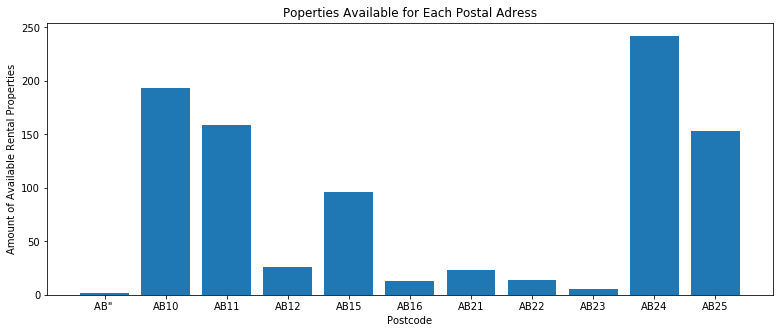

In [142]:
plt.figure(figsize=(13,5))
labels, counts = np.unique(df['area'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Poperties Available for Each Postal Adress')
plt.ylabel('Amount of Available Rental Properties')
plt.xlabel('Postcode')

The most amount of properties are available at AB10, AB11, AB24 and AB25 which seems accurate because AB10 and AB25 is the center of Aberdeen, AB11 is densely populated and AB24 is also close to the center and densely populated. AB24 is also an area popular for providing student accomodation and accomodation for oil rig workers who are not of permanent residence in Aberdeen.

The mean, max and min prices were calculated for each postal area. A bar chart was created to compare the prices of each area.

Text(0.5, 1.0, 'Min Price')

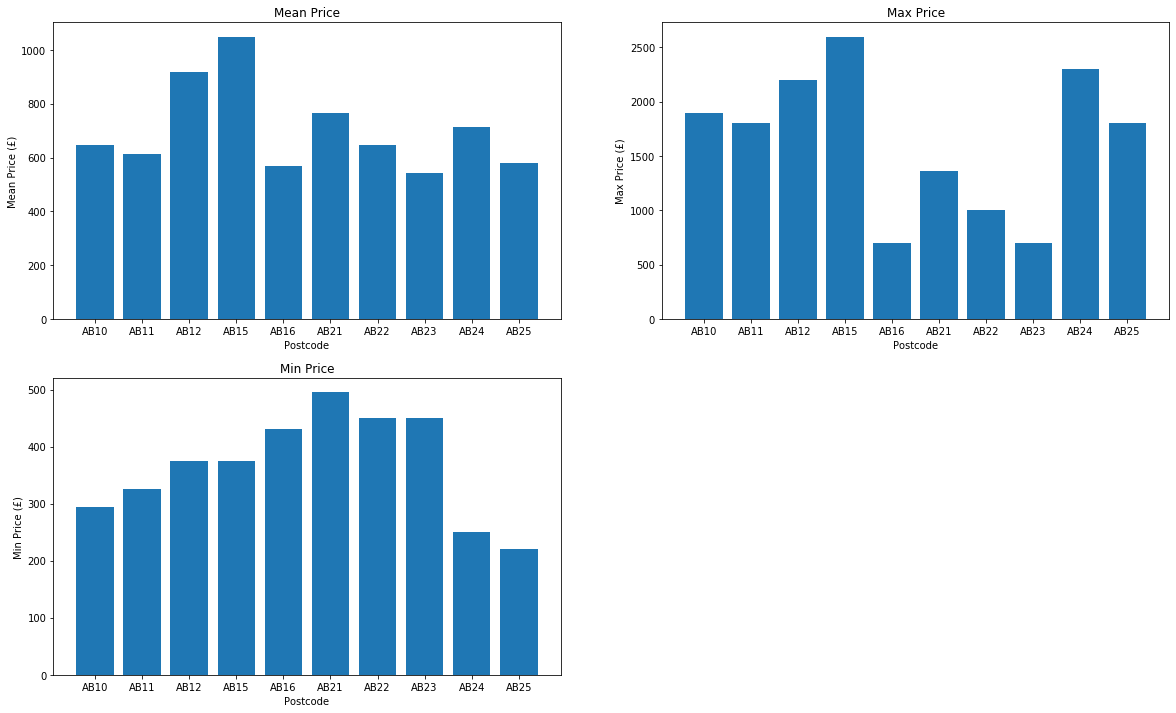

In [159]:
# Store area quieries in variables

AB10_df = df.query('area == "AB10"')
AB11_df = df.query('area == "AB11"')
AB12_df = df.query('area == "AB12"')
AB15_df = df.query('area == "AB15"')
AB16_df = df.query('area == "AB16"')
AB21_df = df.query('area == "AB21"')
AB22_df = df.query('area == "AB22"')
AB23_df = df.query('area == "AB23"')
AB24_df = df.query('area == "AB24"')
AB25_df = df.query('area == "AB25"')

# Work out mean, max, and min prices of all postal areas and store in variables

mean_prices_array = [AB10_df.price.mean(),AB11_df.price.mean(),AB12_df.price.mean(),AB15_df.price.mean(),AB16_df.price.mean(),AB21_df.price.mean(),AB22_df.price.mean(),AB23_df.price.mean(),AB24_df.price.mean(),AB25_df.price.mean()]
max_prices_array = [AB10_df.price.max(),AB11_df.price.max(),AB12_df.price.max(),AB15_df.price.max(),AB16_df.price.max(),AB21_df.price.max(),AB22_df.price.max(),AB23_df.price.max(),AB24_df.price.max(),AB25_df.price.max()]
min_prices_array = [AB10_df.price.min(),AB11_df.price.min(),AB12_df.price.min(),AB15_df.price.min(),AB16_df.price.min(),AB21_df.price.min(),AB22_df.price.min(),AB23_df.price.min(),AB24_df.price.min(),AB25_df.price.min()]

# Create array of postcodes for dataframe

postcodes = ['AB10','AB11','AB12','AB15','AB16','AB21','AB22','AB23','AB24','AB25']

# Create dictionary for dataframe

area_prices_data = {'postcode':postcodes,'mean price':mean_prices_array,'max price':max_prices_array,'min price':min_prices_array}
area_prices_df = pd.DataFrame(area_prices_data)

# Subplot for mean price

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.bar(area_prices_df['postcode'], area_prices_df['mean price'])
plt.ylabel('Mean Price (£)')
plt.xlabel('Postcode')
plt.title('Mean Price')

# Subplot for max price

plt.subplot(2,2,2)
plt.bar(area_prices_df['postcode'], area_prices_df['max price'])
plt.ylabel('Max Price (£)')
plt.xlabel('Postcode')
plt.title('Max Price')

# Subplot for min price

plt.subplot(2,2,3)
plt.bar(area_prices_df['postcode'], area_prices_df['min price'])
plt.ylabel('Min Price (£)')
plt.xlabel('Postcode')
plt.title('Min Price')

According to the data the area with the most expensive property and the least expensive pr operty is AB11. There are clearly some outliers for this area. One type of outlier is the amount of bedrooms for a given property. If this value is really high, the value of the property will also be higher. Another major type of outlier is a flat/house share property as they are not considered one bedroom and will give a false representaion of the property price. 

The dataframe was checked for all properties with more than 4 bedrooms

In [144]:
df.loc[df['bedrooms'] > 4]


,area,bedrooms,price
57,AB10,5,1300
95,AB12,5,2200
121,AB24,6,390
122,AB24,5,420
153,AB10,5,1600
188,AB15,5,1950
285,AB15,5,2100
358,"AB""",11,2500
392,AB15,6,2200
396,AB15,6,2300


Properties with 24, 14 and 11 bedrooms were found in the data. These properties are irregular and so could be removed from the dataframe. The properties which are flat/house shares are also obvious from the data given their prices, for example a 6 bedroom house at AB24 for £390/month is unreasonable and could also be removed from the dataframe.

In [235]:
#df = df.drop([121,122,358,405,467,884,938])


The normal distribution of the price was plotted which showed a rather skewed distribution. 

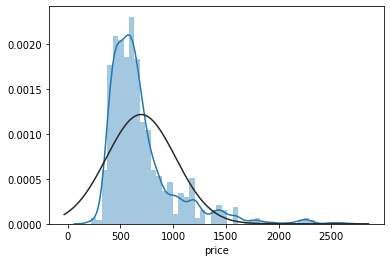

In [152]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(df['price'],fit = norm)

All properties with more than 4 bedrooms were also dropped because they were effecting the price distribution and were only found in lower cost areas which represents an inaccurate description of the property value in those areas.

In [ ]:
# Dropping all properties with more than 4 bedrooms

#df = df.drop([153,188,285,392,396,400,407,427,451,626,636,775])

The price data was transformed with the log function to smooth out the distribution.

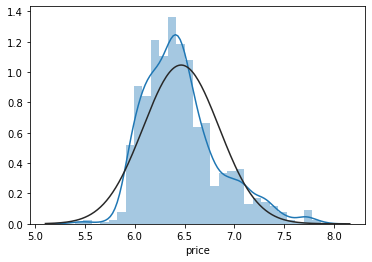

In [153]:
price_log = np.log(df['price']+1)
sns.distplot(price_log,fit = norm)

After removing all outliers, the price distribution was still skewed, although it was good enough to use in a model for house price prediction.

In [154]:
df.describe()

,bedrooms,price
count,905.000000,905.000000
mean,1.948066,696.267403
std,0.845707,327.939905
min,0.000000,220.000000
25%,1.000000,495.000000
50%,2.000000,600.000000
75%,2.000000,750.000000
max,5.000000,2600.000000


### Step 4: Creating Model to Predict Monthly Rental Price.

Each postal area was grouped into a category between 1-3 based on its mean, max and min price compared to the mean price of other postal areas. The average price of each postal area for the year from rightmove.co.uk was also used to categorise each area because the data used in this analysis only quantifies the property values for one day in July of 2020.

In [185]:
area_classification = {'AB10':2,'AB11':1,'AB12':2,'AB15':3,'AB16':1,'AB21':2,'AB22':2,'AB23':2,'AB24':1,'AB25':2}
area_array_for_model = []
area_array_for_model = [area_classification.get(i) for i in df['area']]
count = 0
    
print(len(area_array_for_model))

905


A new dataframe was created with values for area class instead of postcode so a regression model could be built. The new dataframe was stored in a csv file.

In [218]:
data_for_model = {'area class':area_array_for_model,'bedrooms':df['bedrooms'],'price':df['price']}
df_for_model = pd.DataFrame(data_for_model)
df_for_model.to_csv('Aberdeen_flat_rental_data_for_model.csv', index = False)


One of the rows in the csv file was not readable by the regression model and was manually deleted. This new data was then read into the notebook using the pd.read_csv function.  

In [228]:
df_for_model = pd.read_csv("Aberdeen_flat_rental_data_for_model.csv") 


A model was then created using the sklearn module.

In [230]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df_for_model[['area class','bedrooms']], df_for_model.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
reg.coef_, reg.intercept_

(array([ 73.84129215, 290.74147003]), 7.97424277073344)

The coefficients were then used to predict monthly rental price given area class and number of bedrooms required.

Results for a 1-bedroom property in a cheap area, a 2-bedroom property in a cheap area, a 2-bedroom property in a medium price area are shown below.

In [243]:
Price_prediction_1 = (1*73.84129215)+(1*290.74147003) + 7.97424277073344
Price_prediction_2 = (1*73.84129215)+(2*290.74147003) + 7.97424277073344
Price_prediction_3 = (2*73.84129215)+(2*290.74147003) + 7.97424277073344

print(Price_prediction_1, Price_prediction_2, Price_prediction_3)

372.55700495073347 663.2984749807334 737.1397671307335


After comparing the results of this model to Aberdeen rental price data on various websites, this model has proven to be reasonably accurate. 

## Conclusion

Although the model is reasonably accurate at predicting property prices in Aberdeen there are still some outliers which are driving the model. The data shows that there are far more properties available in the cheaper areas than in the more expensive areas. Some of these properties contain four or more bedrooms which will greatly effect the mean price of the area. The data also only represents one day from the rightmove website which is constantly changing and so the model is likely to change everyday. 